## Problem Statement: Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
cola.shape

(42, 2)

In [5]:
p = cola["Quarter"][0]
p[0:2]
cola['Quarters']= 0
cola['Year']=0

for i in range(42):
    p = cola['Quarter'][i]
    cola['Quarters'][i]=p[0:2]
    cola['Year'][i]=p[3:5]

In [6]:
cola

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


<AxesSubplot:>

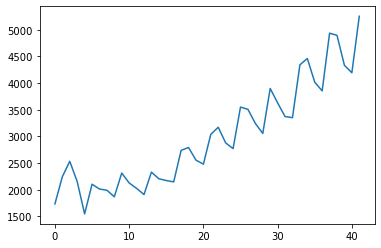

In [7]:
cola.Sales.plot()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

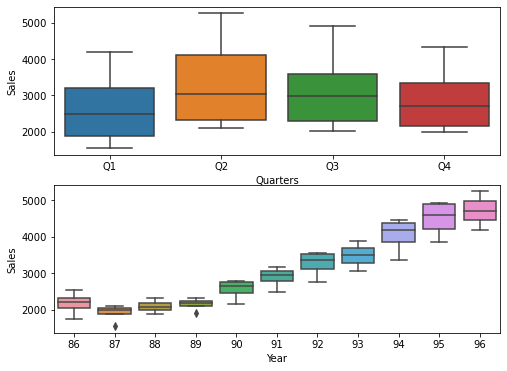

In [8]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=cola)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=cola)

Quarters           Q1           Q2           Q3           Q4
Year                                                        
86        1734.827000  2244.960999  2533.804993  2154.962997
87        1547.818996  2104.411995  2014.362999  1991.746998
88        1869.049999  2313.631996  2128.320000  2026.828999
89        1910.603996  2331.164993  2206.549995  2173.967995
90        2148.278000  2739.307999  2792.753998  2556.009995
91        2480.973999  3039.522995  3172.115997  2879.000999
92        2772.000000  3550.000000  3508.000000  3243.859993
93        3056.000000  3899.000000  3629.000000  3373.000000
94        3352.000000  4342.000000  4461.000000  4017.000000
95        3854.000000  4936.000000  4895.000000  4333.000000
96        4194.000000  5253.000000     0.000000     0.000000


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

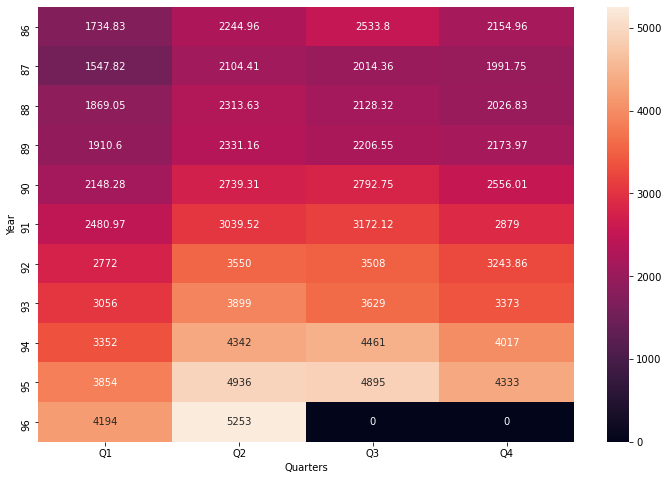

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola,values="Sales",index="Year",columns="Quarters",
                                 aggfunc="mean",fill_value=0)
print(heatmap_y_month)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='Year', ylabel='Sales'>

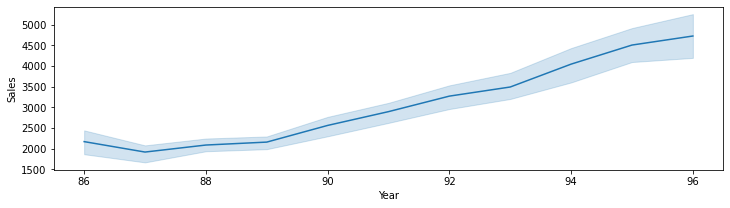

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=cola)

## Time series decomposition plot

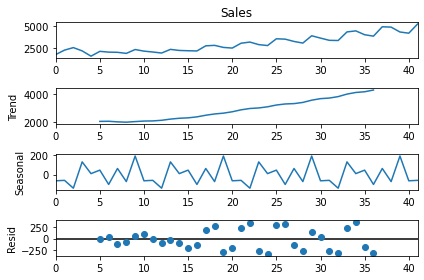

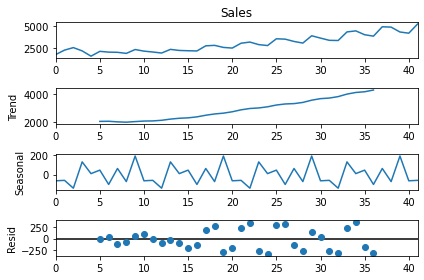

In [11]:
seasonal_ts_add=smf.tsa.seasonal_decompose(cola["Sales"],freq=10)
seasonal_ts_add.plot()

In [12]:
# We will create dummy variables for 'Quarters' column
dummies = pd.DataFrame(pd.get_dummies(cola['Quarters']))
data = pd.concat([cola,dummies],axis = 1)

In [13]:
data

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [14]:
len(data)

42

In [15]:
data["t"] = np.arange(1,43)
data["t_square"] = data["t"]**2
data["log_Sales"] = np.log(data["Sales"])
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [16]:
data.columns

Index(['Quarter', 'Sales', 'Quarters', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_square', 'log_Sales'],
      dtype='object')

## Splitting the data

In [17]:
train = data.head(33)
test = data.tail(9)

In [18]:
test

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_square,log_Sales
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


In [19]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

811.0635934509908

In [20]:
#Exponential

exp = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

646.8116922622174

In [21]:
#Quadratic 

quad = smf.ols('Sales~t+t_square',data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

423.1005737527195

In [22]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1884.9697647455082

In [23]:
#Additive Seasonality Quadratic 

add_sea_quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.94379798406402

In [24]:
##Multiplicative Seasonality

mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test))
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1947.3794193190088

In [25]:
#Multiplicative Additive Seasonality 

mul_add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

432.6446812080353

In [26]:
#Compare the results 

df = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,225.943798
2,rmse_Quad,423.100574
6,rmse_Mult_add_sea,432.644681
1,rmse_Exp,646.811692
0,rmse_linear,811.063593
3,rmse_add_sea,1884.969765
5,rmse_Mult_sea,1947.379419


### From the above RMSE values we can say that Additive Seasonality Quadratic  has the lowest score hence it will be the best model to use.

## Predicting new Data

In [27]:
new_data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2'],['Q3_97', 'Q3'],['Q4_97', 'Q4'],
            ['Q1_98', 'Q1'],['Q2_98', 'Q2'],['Q3_98', 'Q3'],['Q4_98', 'Q4']]
data1 = pd.DataFrame(new_data, columns = ['Quarter', 'Quarters'])
data1

,Quarter,Quarters
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2
4,Q3_97,Q3
5,Q4_97,Q4
6,Q1_98,Q1
7,Q2_98,Q2
8,Q3_98,Q3
9,Q4_98,Q4


In [28]:
dummies1 = pd.DataFrame(pd.get_dummies(data1['Quarters']))
data1 = pd.concat([data1,dummies1],axis = 1)

In [29]:
data1

,Quarter,Quarters,Q1,Q2,Q3,Q4
0,Q3_96,Q3,0,0,1,0
1,Q4_96,Q4,0,0,0,1
2,Q1_97,Q1,1,0,0,0
3,Q2_97,Q2,0,1,0,0
4,Q3_97,Q3,0,0,1,0
5,Q4_97,Q4,0,0,0,1
6,Q1_98,Q1,1,0,0,0
7,Q2_98,Q2,0,1,0,0
8,Q3_98,Q3,0,0,1,0
9,Q4_98,Q4,0,0,0,1


In [30]:
len(data1)

10

In [31]:
data1["t"] = np.arange(42,52)
data1["t_square"] = data1["t"]**2
data1

,Quarter,Quarters,Q1,Q2,Q3,Q4,t,t_square
0,Q3_96,Q3,0,0,1,0,42,1764
1,Q4_96,Q4,0,0,0,1,43,1849
2,Q1_97,Q1,1,0,0,0,44,1936
3,Q2_97,Q2,0,1,0,0,45,2025
4,Q3_97,Q3,0,0,1,0,46,2116
5,Q4_97,Q4,0,0,0,1,47,2209
6,Q1_98,Q1,1,0,0,0,48,2304
7,Q2_98,Q2,0,1,0,0,49,2401
8,Q3_98,Q3,0,0,1,0,50,2500
9,Q4_98,Q4,0,0,0,1,51,2601


In [32]:
#Additive Seasonality Quadratic 
model = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=data).fit()

In [33]:
pred_new = pd.Series(model.predict(data1))
pred_new

0    5172.938777
1    4987.623997
2    4915.820345
3    5708.822503
4    5781.298531
5    5610.048173
6    5552.308945
7    6359.375525
8    6445.915976
9    6288.730041
dtype: float64

In [34]:
data1

,Quarter,Quarters,Q1,Q2,Q3,Q4,t,t_square
0,Q3_96,Q3,0,0,1,0,42,1764
1,Q4_96,Q4,0,0,0,1,43,1849
2,Q1_97,Q1,1,0,0,0,44,1936
3,Q2_97,Q2,0,1,0,0,45,2025
4,Q3_97,Q3,0,0,1,0,46,2116
5,Q4_97,Q4,0,0,0,1,47,2209
6,Q1_98,Q1,1,0,0,0,48,2304
7,Q2_98,Q2,0,1,0,0,49,2401
8,Q3_98,Q3,0,0,1,0,50,2500
9,Q4_98,Q4,0,0,0,1,51,2601


In [35]:
data1["Forecasted_Sales"] = pd.Series(pred_new)

In [36]:
final = pd.concat([data,data1])

<AxesSubplot:>

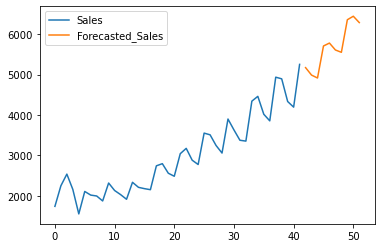

In [37]:
final[['Sales','Forecasted_Sales']].reset_index(drop=True).plot()